* `import important liberaries`

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer , ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import cosine_similarity

* `read the data`

In [3]:
path = os.path.join(os.getcwd(), '..', 'dataset' , 'dataset.csv' )
df = pd.read_csv(path)
df.head()

,id_ra,name,category,total_kg_co2-eq/kg,agriculture,iluc,food_processing,packaging,transport,retail,Price,StockQuantity
0,Ra00001,"Pepper, sweet, red, raw",Vegetables,1.07,0.61,0.04,0.0,0.14,0.28,0.01,9.0,300
1,Ra00002,"Tomato, ripe, raw, origin unknown",Vegetables,0.48,0.21,0.01,0.0,0.14,0.11,0.01,8.0,300
2,Ra00003,"Squash, raw",Vegetables,0.84,0.48,0.04,0.0,0.06,0.25,0.01,8.0,300
3,Ra00004,"Aubergine, raw",Vegetables,0.99,0.51,0.03,0.0,0.14,0.30,0.01,8.0,300
4,Ra00005,"Tomato, dried",Vegetables,2.72,2.04,0.09,0.0,0.26,0.33,0.01,11.0,300


In [4]:
df['nam_category'] = df['name'] + ' ' + df['category']
df.head()

,id_ra,name,category,total_kg_co2-eq/kg,agriculture,iluc,food_processing,packaging,transport,retail,Price,StockQuantity,nam_category
0,Ra00001,"Pepper, sweet, red, raw",Vegetables,1.07,0.61,0.04,0.0,0.14,0.28,0.01,9.0,300,"Pepper, sweet, red, raw Vegetables"
1,Ra00002,"Tomato, ripe, raw, origin unknown",Vegetables,0.48,0.21,0.01,0.0,0.14,0.11,0.01,8.0,300,"Tomato, ripe, raw, origin unknown Vegetables"
2,Ra00003,"Squash, raw",Vegetables,0.84,0.48,0.04,0.0,0.06,0.25,0.01,8.0,300,"Squash, raw Vegetables"
3,Ra00004,"Aubergine, raw",Vegetables,0.99,0.51,0.03,0.0,0.14,0.30,0.01,8.0,300,"Aubergine, raw Vegetables"
4,Ra00005,"Tomato, dried",Vegetables,2.72,2.04,0.09,0.0,0.26,0.33,0.01,11.0,300,"Tomato, dried Vegetables"


In [5]:
df['nam_category'].unique()

array(['Pepper, sweet, red, raw Vegetables',
       'Tomato, ripe, raw, origin unknown Vegetables',
       'Squash, raw Vegetables', 'Aubergine, raw Vegetables',
       'Tomato, dried Vegetables', 'Pumpkin, raw Vegetables',
       'Cucumber, raw Vegetables', 'Gherkin cucumber, raw Vegetables',
       'Pepper, hot chili, raw Vegetables',
       'Beef, topside, cap off, raw Meat/poultry',
       'Beef, fillet, defatted, raw Meat/poultry',
       'Beef, mince, 10-15% fat, raw Meat/poultry',
       'Beef, rump, raw Meat/poultry',
       'Beef, mince, 15-20% fat, raw Meat/poultry',
       'Beef, T-bone steak, raw Meat/poultry',
       'Beef, mince, 5-10% fat, raw Meat/poultry',
       'Beer, lager, alc. 4.4 % by vol. Beverages',
       'Beer, Danish household, low alcohol Beverages',
       'Beer, strong, alc. 7.6 % by vol. Beverages',
       'Biscuit, sweet Bread/bakery',
       'Biscuit, wholemeal, digestive type Bread/bakery',
       'Butter cookie, wheat, Danish, industrially produced B

In [6]:
custom_stopwords = list(ENGLISH_STOP_WORDS.union({' raw', ' dried', 'red', 'unknown', 
                                                  'concentrated', 'average', 'ready' , 
                                                  ' meals' , 'frozen', 'products'}))

tfidf = TfidfVectorizer(stop_words=custom_stopwords)
tfidf_matrix=tfidf.fit_transform(df['nam_category'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
pd.DataFrame(cosine_sim)

C:\Users\LORD TRADE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['dried', 'meals', 'raw'] not in stop_words.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,1.000000,0.107588,0.159223,0.159223,0.087527,0.167541,0.173910,0.128036,0.458645,0.049802,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.107588,1.000000,0.131693,0.131693,0.344950,0.138573,0.143840,0.105898,0.093585,0.041191,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.159223,0.131693,1.000000,0.194896,0.107137,0.205078,0.212874,0.156721,0.138499,0.060960,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.159223,0.131693,0.194896,1.000000,0.107137,0.205078,0.212874,0.156721,0.138499,0.060960,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.087527,0.344950,0.107137,0.107137,1.000000,0.112734,0.117019,0.086151,0.076134,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.269082,...,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.487871,0.487871,0.0,0.0
501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265571,...,0.0,0.000000,0.0,0.0,0.000000,0.487871,1.000000,0.481506,0.0,0.0
502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551543,...,0.0,0.000000,0.0,0.0,0.000000,0.487871,0.481506,1.000000,0.0,0.0
503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.139922,0.000000,0.000000,0.000000,1.0,0.0


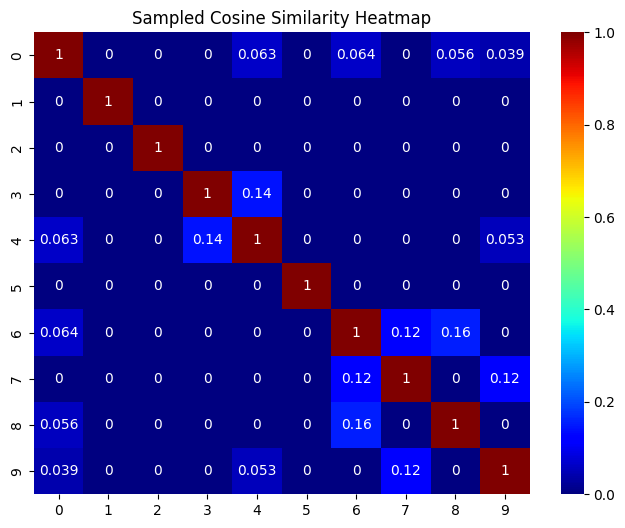

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


sample_indices = np.random.choice(len(cosine_sim), size=10, replace=False)
sample_matrix = cosine_sim[np.ix_(sample_indices, sample_indices)]


plt.figure(figsize=(8, 6))
sns.heatmap(sample_matrix, cmap="jet", annot=True)
plt.title("Sampled Cosine Similarity Heatmap")
plt.show()


In [8]:
tfidf_matrix.toarray() , len(tfidf.get_feature_names_out())

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 594)

In [9]:
def product_index_(product_name):
    try:
        return df[df['name'] == product_name].index[0]
    except IndexError:
        print(" not found ")
        return None
product_index_('Pepper, sweet, red, raw')

0

In [10]:
def recommend_low_carbon(product_name, top_n):
    product_index = product_index_(product_name)
    if product_index is None:
        return None
    
    similarities = list(enumerate(cosine_sim[product_index]))
    
    similarities = [item for item in similarities if item[0] != product_index]
    
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]
    
    similar_products = df.iloc[[int(i[0]) for i in similarities]].copy()
    
    similar_products = similar_products[similar_products['total_kg_co2-eq/kg'] < df.loc[product_index, 'total_kg_co2-eq/kg']]
    
    return similar_products[['id_ra','name', 'total_kg_co2-eq/kg', 'Price']]

product_name = "Beef, T-bone steak, raw"
recommendations = recommend_low_carbon(product_name, top_n=5)
print(recommendations)
   


       id_ra             name  total_kg_co2-eq/kg  Price
502  Ra00503     Average beef               74.84  282.0
12   Ra00013  Beef, rump, raw               67.82  272.0
462  Ra00463      Pulled beef               56.34  255.0
488  Ra00489   Beef, low fat                53.19  250.0


In [11]:
df[df['name'] == "Beef, T-bone steak, raw"]


,id_ra,name,category,total_kg_co2-eq/kg,agriculture,iluc,food_processing,packaging,transport,retail,Price,StockQuantity,nam_category
14,Ra00015,"Beef, T-bone steak, raw",Meat/poultry,120.83,98.28,25.54,-4.81,0.14,1.68,0.0,351.0,300,"Beef, T-bone steak, raw Meat/poultry"
